# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [3]:
n = 10
k = 3
p = 0.25

p_3_strikes = (factorial(n) / (factorial(n-k) * factorial(k))) * (p**k) * ((1-p)**(n-k))
p_3_strikes

#answer = 0.2502822

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [4]:
def binom_distr(n,p,k):
    return (factorial(n) / (factorial(n-k) * factorial(k))) * (p**k) * ((1-p)**(n-k))

Validate your previous result by applying your new function.

In [5]:
# Your code here
binom_distr(10,0.25,3)

0.25028228759765625

Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [7]:
import numpy as np

# Your code here
my_prob = 0

for i in range(5, 12):
    print (f'Prob of {i} strikes: {binom_distr(10, 0.25, i)}')
    my_prob += binom_distr(10, 0.25, i)
my_prob

Prob of 5 strikes: 0.058399200439453125
Prob of 6 strikes: 0.016222000122070312
Prob of 7 strikes: 0.00308990478515625
Prob of 8 strikes: 0.00038623809814453125
Prob of 9 strikes: 2.86102294921875e-05
Prob of 10 strikes: 9.5367431640625e-07
Prob of 11 strikes: 2.8899221709280304e-08


0.07812693624785452

## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [8]:
# leave the random seed here for reproducibility of results
np.random.seed(123)
np.random.binomial(10, 0.25)

3

In [9]:
%%time

my_list = []
for i in range(5000):
    my_list.append(np.random.binomial(10, 0.25))

CPU times: user 10.6 ms, sys: 130 µs, total: 10.8 ms
Wall time: 10.7 ms


In [10]:
%%time
my_list2 = np.random.binomial(10, 0.25, 5000)

CPU times: user 335 µs, sys: 97 µs, total: 432 µs
Wall time: 236 µs


In [11]:
np.unique(my_list)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
np.bincount(my_list)

array([ 310,  941, 1368, 1286,  707,  297,   78,   11,    2])

In [ ]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

<BarContainer object of 9 artists>

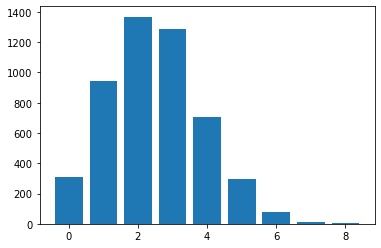

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(np.unique(my_list), np.bincount(my_list))

You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

<BarContainer object of 9 artists>

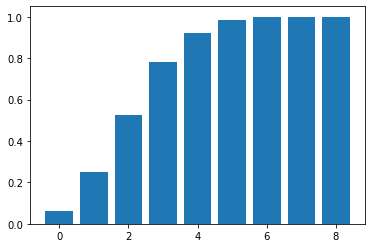

In [14]:
# Your code here
plt.bar(np.unique(my_list), np.cumsum(np.bincount(my_list) / 5000)) #should be equal 1

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.